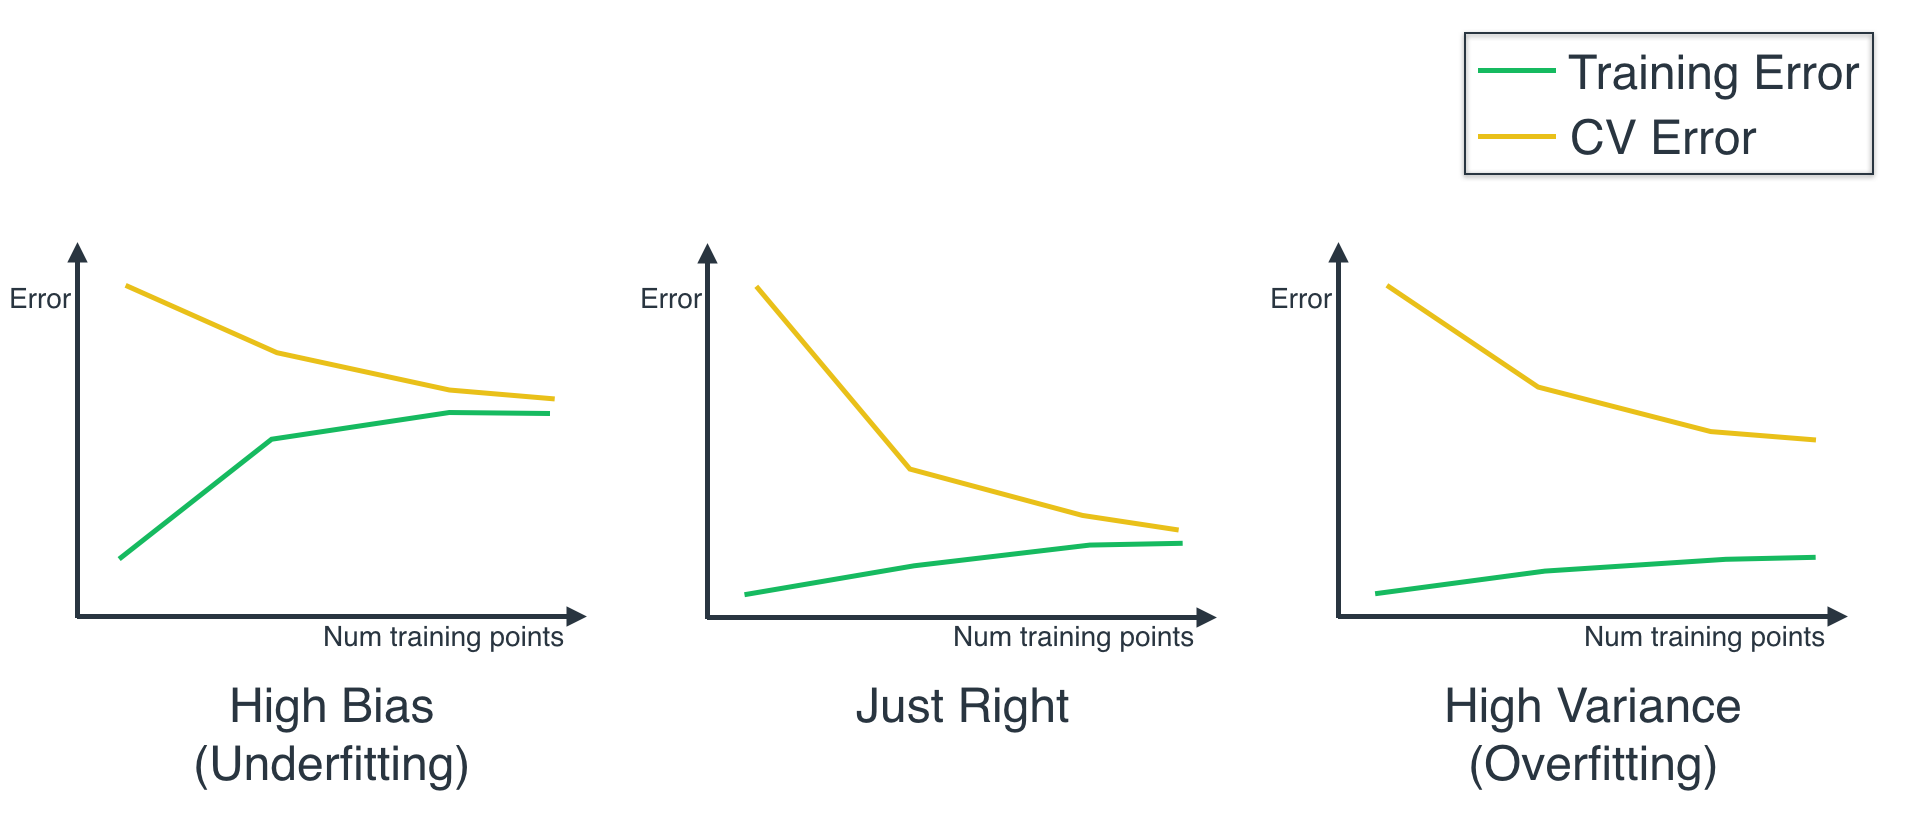

```
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
```
    
No need to worry about all the parameters of this function (you can read some more in here, but here we'll explain the main ones:

*estimator, is the actual classifier we're using for the data, e.g., LogisticRegression() or GradientBoostingClassifier().
*X and y is our data, split into features and labels.
*train_sizes are the sizes of the chunks of data used to draw each point in the curve.
*train_scores are the training scores for the algorithm trained on each chunk of data.
*test_scores are the testing scores for the algorithm trained on each chunk of data.

#### Two very important observations:

* The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
* Very important: As you can see, we defined our curves with Training and Testing Error, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

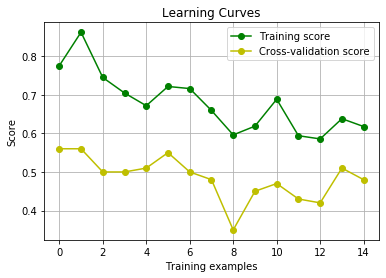

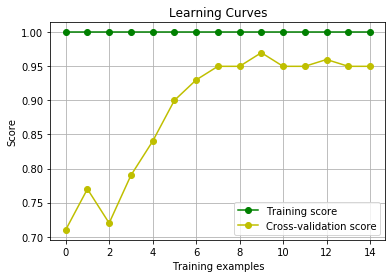

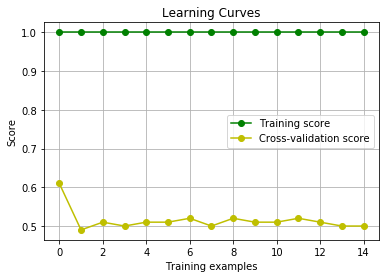

In [16]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('testData/learningCurvesData.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.
X2, y2 = randomize(X, y)

### Logistic Regression
estimator1 = LogisticRegression()
draw_learning_curves(X2, y2, estimator1, 15)
### Decision Tree
estimator2 = GradientBoostingClassifier()
draw_learning_curves(X2, y2, estimator2, 15)
### Support Vector Machine
estimator3 = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X2, y2, estimator3, 15)

In [10]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()